<a href="https://colab.research.google.com/github/LouisaEdwards/ML/blob/main/EV_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Electric Vehicles for Virginia**
ML4VA Project - Fall 2021

Louisa Edwards, Justin (Da) Lin, Tingwei Zhang


# Set Up

In [ ]:
# download Anvil (for our user interface)
!pip install anvil-uplink

     |████████████████████████████████| 64 kB 1.9 MB/s 
     |████████████████████████████████| 51 kB 205 kB/s 
  Created wheel for ws4py: filename=ws4py-0.5.1-py3-none-any.whl size=45230 sha256=48b8598bff9edbd814bffb79a7746a7321501a9bcb360a619bb70bec38105075
  Stored in directory: /root/.cache/pip/wheels/29/ea/7d/3410aa0aa0e4402ead9a7a97ab2214804887e0f5c2b76f0c96
Successfully built ws4py


In [ ]:
# import anvil
import anvil.server

In [ ]:
# connect to the serveer 
anvil.server.connect("JK6AMGF4YZGL6NB3TGV3CKPM-DYH5DX3R4JNVKDC6")

Connecting to wss://anvil.works/uplink
Anvil websocket open
Connected to "Default environment" as SERVER


# Getting the Data

In [ ]:
# import statements
import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
np.random.seed(42)

# function to load the data
PATH = "sample_data"
def load_car_data(PATH=PATH):
    csv_path = os.path.join(PATH, "Cardata.csv")
    return pd.read_csv(csv_path)

In [ ]:
# load the data 
cardata = load_car_data()

# get summary statistics 
cardata.describe()

,Year,MSRP,whether_recommended,tax_credit,number_of_seats,mixed_fuel_consumption_per_100_km_l,city_fuel_per_100km_l,highway_fuel_per_100km_l,D_Price,CO2_per_100km_kg
count,13529.000000,1.352900e+04,13529.000000,116.000000,13529.000000,13488.000000,13488.000000,13488.000000,1.352900e+04,13529.000000
mean,2014.911819,5.487341e+04,0.008574,2211.413793,4.725774,7.270916,9.168103,6.041735,2.307302e+04,23.018700
std,3.358945,1.844806e+05,0.092202,3223.130177,0.801048,2.706524,3.683956,2.036485,1.119858e+05,8.393349
min,1994.000000,2.000000e+03,0.000000,0.000000,1.000000,3.000000,3.100000,2.900000,2.485084e+01,0.000000
25%,2015.000000,3.077500e+04,0.000000,0.000000,4.000000,5.300000,6.300000,4.600000,1.217061e+04,16.900000
50%,2016.000000,4.230000e+04,0.000000,0.000000,5.000000,6.600000,8.400000,5.600000,1.779258e+04,21.000000
75%,2016.000000,5.930000e+04,0.000000,4502.000000,5.000000,8.500000,11.200000,6.900000,2.657795e+04,26.700000
max,2018.000000,2.100000e+07,1.000000,7500.000000,8.000000,24.400000,34.500000,16.500000,1.289662e+07,76.600000


In [ ]:
# get basic info about the data
cardata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13529 entries, 0 to 13528
Data columns (total 19 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Make                                 13529 non-null  object 
 1   Model                                13529 non-null  object 
 2   Year                                 13529 non-null  int64  
 3   Vehicle.Size                         13529 non-null  object 
 4   MSRP                                 13529 non-null  int64  
 5   generation                           13529 non-null  object 
 6   series                               13529 non-null  object 
 7   trim                                 13529 non-null  object 
 8   engine_type                          13529 non-null  object 
 9   whether_recommended                  13529 non-null  int64  
 10  tax_credit                           116 non-null    float64
 11  number_of_seats             

In [ ]:
# look at the first five rows 
cardata.head()

,Make,Model,Year,Vehicle.Size,MSRP,generation,series,trim,engine_type,whether_recommended,tax_credit,number_of_seats,mixed_fuel_consumption_per_100_km_l,range_km,city_fuel_per_100km_l,fuel_grade,highway_fuel_per_100km_l,D_Price,CO2_per_100km_kg
0,Aston Martin,DB7,2003,Compact,156300,2 generation,GT Coupe,5.9 MT,Gas,0,NaN,4,19.6,390|540,22.6,95,16.5,8384.933853,61.5
1,Aston Martin,DB7,2003,Compact,151800,2 generation,GT Coupe,5.9 MT,Gas,0,NaN,4,19.6,390|540,22.6,95,16.5,8143.525008,61.5
2,Aston Martin,DB7,2003,Compact,156300,2 generation,GT Coupe,5.9 MT,Gas,0,NaN,4,19.6,390|540,22.6,95,16.5,8384.933853,61.5
3,Aston Martin,DB7,2003,Compact,141800,2 generation,GT Coupe,5.9 MT,Gas,0,NaN,4,19.6,390|540,22.6,95,16.5,7607.060910,61.5
4,Audi,A3,2016,Compact,34200,8V [redesign],Cabriolet,1.4 TFSI MT,Gas,0,NaN,4,5.3,"720|1,140",6.9,95,4.4,15174.721687,16.6


In [ ]:
# get the shape of the data
cardata.shape

(13529, 19)

In [ ]:
# get the data type
cardata.dtypes
cardata['number_of_seats'].replace('5, 7','5')
cardata['number_of_seats'].unique()

array([4, 5, 7, 2, 6, 8, 1])

In [ ]:
# convert to an int
cardata['number_of_seats'].astype('int64')

0        4
1        4
2        4
3        4
4        4
        ..
13524    5
13525    5
13526    5
13527    5
13528    5
Name: number_of_seats, Length: 13529, dtype: int64

In [ ]:
# view the engine type value counts
print(cardata["engine_type"].value_counts())

Gas         9231
Diesel      4165
Hybrid        75
Electric      41
Ethanol       17
Name: engine_type, dtype: int64


In [ ]:
# view the vehicle size value counts
print(cardata["Vehicle.Size"].value_counts())

Midsize    6851
Compact    5156
Large      1522
Name: Vehicle.Size, dtype: int64


# Exploratory Data Analysis

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb42f5e0f90>,
      dtype=object)

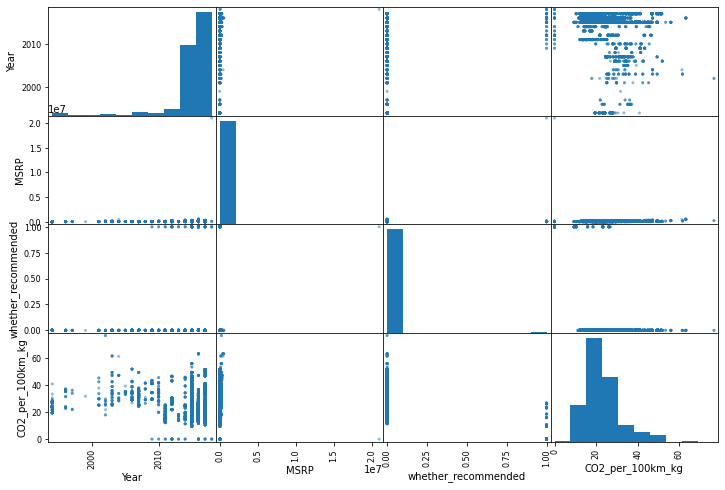

In [ ]:
# create scatterplots
from pandas.plotting import scatter_matrix
attributes = ["Year", "MSRP", "whether_recommended",
              "CO2_per_100km_kg"]
scatter_matrix(cardata[attributes], figsize=(12, 8))

In [ ]:
# look at correlation between price and other features
corr_matrix = cardata.corr()
corr_matrix["MSRP"].sort_values(ascending=False)

MSRP                                   1.000000
D_Price                                0.996482
city_fuel_per_100km_l                  0.408710
mixed_fuel_consumption_per_100_km_l    0.311881
highway_fuel_per_100km_l               0.244361
whether_recommended                    0.080337
Year                                   0.049984
CO2_per_100km_kg                       0.045014
tax_credit                            -0.059933
number_of_seats                       -0.127629
Name: MSRP, dtype: float64

In [ ]:
# separate the regular cars from the hybrid and electric cars
regular = cardata[cardata['whether_recommended'] ==0 ]
recommend = cardata[cardata['whether_recommended'] > 0]

In [ ]:
# look at the first five rows of regular cars
regular.head()

,Make,Model,Year,Vehicle.Size,MSRP,generation,series,trim,engine_type,whether_recommended,tax_credit,number_of_seats,mixed_fuel_consumption_per_100_km_l,range_km,city_fuel_per_100km_l,fuel_grade,highway_fuel_per_100km_l,D_Price,CO2_per_100km_kg
0,Aston Martin,DB7,2003,Compact,156300,2 generation,GT Coupe,5.9 MT,Gas,0,NaN,4,19.6,390|540,22.6,95,16.5,8384.933853,61.5
1,Aston Martin,DB7,2003,Compact,151800,2 generation,GT Coupe,5.9 MT,Gas,0,NaN,4,19.6,390|540,22.6,95,16.5,8143.525008,61.5
2,Aston Martin,DB7,2003,Compact,156300,2 generation,GT Coupe,5.9 MT,Gas,0,NaN,4,19.6,390|540,22.6,95,16.5,8384.933853,61.5
3,Aston Martin,DB7,2003,Compact,141800,2 generation,GT Coupe,5.9 MT,Gas,0,NaN,4,19.6,390|540,22.6,95,16.5,7607.060910,61.5
4,Audi,A3,2016,Compact,34200,8V [redesign],Cabriolet,1.4 TFSI MT,Gas,0,NaN,4,5.3,"720|1,140",6.9,95,4.4,15174.721687,16.6


In [ ]:
# basic summary statistics 
regular.describe()

,Year,MSRP,whether_recommended,tax_credit,number_of_seats,mixed_fuel_consumption_per_100_km_l,city_fuel_per_100km_l,highway_fuel_per_100km_l,D_Price,CO2_per_100km_kg
count,13413.000000,13413.000000,13413.0,0.0,13413.000000,13413.000000,13413.000000,13413.000000,13413.000000,13413.000000
mean,2014.912324,53495.199806,0.0,NaN,4.724372,7.279036,9.180293,6.047008,22199.008521,23.115660
std,3.369161,40123.703632,0.0,NaN,0.800201,2.707177,3.682253,2.037646,17040.908926,8.309641
min,1994.000000,2000.000000,0.0,NaN,2.000000,3.400000,3.800000,3.100000,24.850835,11.300000
25%,2015.000000,30900.000000,0.0,NaN,4.000000,5.300000,6.300000,4.600000,12276.216734,17.000000
50%,2016.000000,42330.000000,0.0,NaN,5.000000,6.600000,8.400000,5.600000,17792.583031,21.400000
75%,2016.000000,59300.000000,0.0,NaN,5.000000,8.600000,11.200000,6.900000,26577.948219,27.000000
max,2017.000000,535500.000000,0.0,NaN,8.000000,24.400000,34.500000,16.500000,237604.194844,76.600000


In [ ]:
# shape
regular.shape

(13413, 19)

/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/misc.py:80: UserWarning: Attempting to set identical left == right == 0.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[j])
/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/misc.py:81: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  ax.set_ylim(boundaries_list[i])
/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/misc.py:71: UserWarning: Attempting to set identical left == right == 0.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[i])


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb42e921250>,
      dtype=object)

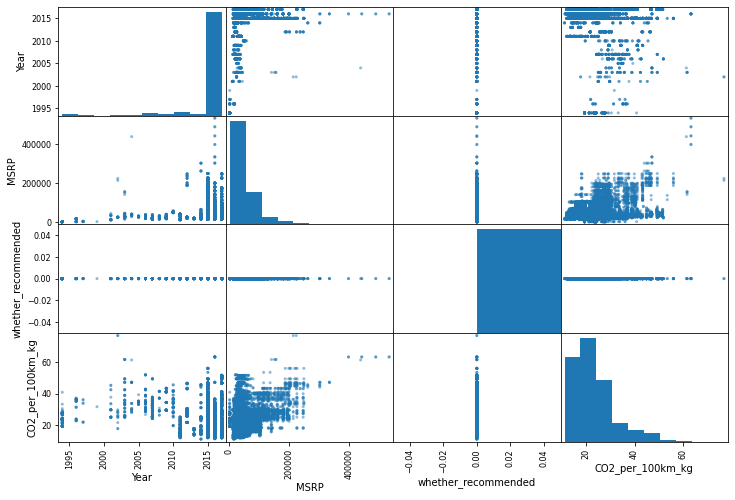

In [ ]:
scatter_matrix(regular[attributes], figsize=(12, 8))

In [ ]:
# look at the first five rows of electric and hybrid cars 
recommend.head()

,Make,Model,Year,Vehicle.Size,MSRP,generation,series,trim,engine_type,whether_recommended,tax_credit,number_of_seats,mixed_fuel_consumption_per_100_km_l,range_km,city_fuel_per_100km_l,fuel_grade,highway_fuel_per_100km_l,D_Price,CO2_per_100km_kg
1636,Audi,e-tron,2018,Midsize,39500,1 generation,Crossover,55 quattro,Electric,1,7500.0,5,NaN,NaN,NaN,NaN,NaN,24257.937500,0.0
4364,BMW,i3,2013,Midsize,39900,I01,Hatchback,i3,Electric,1,7500.0,5,NaN,NaN,NaN,NaN,NaN,10872.371949,0.0
4365,BMW,i3,2017,Midsize,43395,I01 [redesign],Hatchback,i3,Electric,1,7500.0,5,NaN,NaN,NaN,NaN,NaN,22652.461219,0.0
4366,BMW,i3,2017,Midsize,43395,I01 [redesign],Hatchback,i3s,Electric,1,7500.0,5,NaN,NaN,NaN,NaN,NaN,22652.461219,0.0
4842,Chevrolet,Malibu,2015,Midsize,28195,9 generation,Sedan,1.8 AT,Hybrid,1,0.0,5,5.1,NaN,4.9,95,5.2,10633.730593,15.9


In [ ]:
# basic summary statistics
recommend.describe()

,Year,MSRP,whether_recommended,tax_credit,number_of_seats,mixed_fuel_consumption_per_100_km_l,city_fuel_per_100km_l,highway_fuel_per_100km_l,D_Price,CO2_per_100km_kg
count,116.000000,1.160000e+02,116.0,116.000000,116.000000,75.000000,75.000000,75.000000,1.160000e+02,116.000000
mean,2014.853448,2.142352e+05,1.0,2211.413793,4.887931,5.818667,6.988000,5.098667,1.241341e+05,11.807241
std,1.833288,1.946761e+06,0.0,3223.130177,0.882403,2.152792,3.344336,1.561920,1.196235e+06,10.307214
min,2009.000000,6.160000e+03,1.0,0.000000,1.000000,3.000000,3.100000,2.900000,1.212746e+03,0.000000
25%,2015.000000,2.362500e+04,1.0,0.000000,5.000000,3.300000,3.100000,3.300000,8.755526e+03,0.000000
50%,2015.000000,2.924500e+04,1.0,0.000000,5.000000,5.900000,5.900000,5.800000,1.072425e+04,10.400000
75%,2016.000000,3.992000e+04,1.0,4502.000000,5.000000,7.400000,10.100000,6.000000,1.607885e+04,23.200000
max,2018.000000,2.100000e+07,1.0,7500.000000,7.000000,8.500000,10.700000,7.300000,1.289662e+07,26.700000


In [ ]:
# shape
recommend.shape

(116, 19)

/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/misc.py:80: UserWarning: Attempting to set identical left == right == 1.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[j])
/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/misc.py:81: UserWarning: Attempting to set identical bottom == top == 1.0 results in singular transformations; automatically expanding.
  ax.set_ylim(boundaries_list[i])
/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/misc.py:71: UserWarning: Attempting to set identical left == right == 1.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[i])


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb42e92bed0>,
      dtype=object)

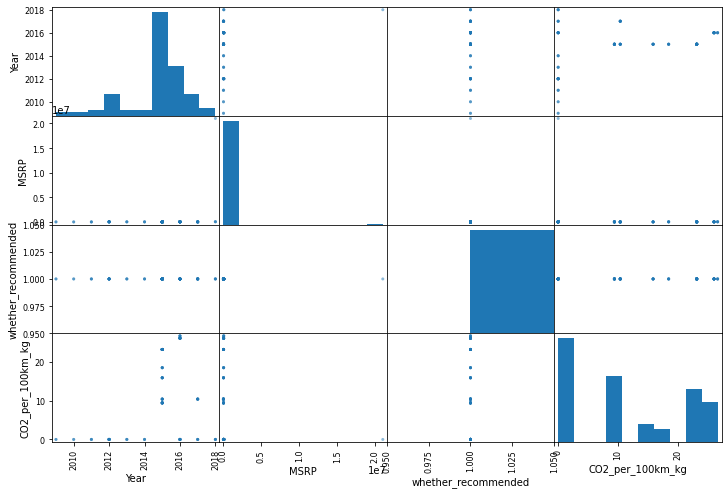

In [ ]:
scatter_matrix(recommend[attributes], figsize=(12, 8))

# Data Cleaning

In [ ]:
# remove the extra characters in the range column
cardata['range_low'] = cardata['range_km'].str.split('|').str[0]
cardata['range_high'] = cardata['range_km'].str.split('|').str[1]
cardata.drop(columns='range_km')

# extract the min and max values from the range column
cardata['range_high'] = cardata['range_high'].str.replace(',', '').astype(float)
cardata['range_low'] = cardata['range_low'].str.replace(',', '').astype(float)

cardata.head()

,Make,Model,Year,Vehicle.Size,MSRP,generation,series,trim,engine_type,whether_recommended,tax_credit,number_of_seats,mixed_fuel_consumption_per_100_km_l,range_km,city_fuel_per_100km_l,fuel_grade,highway_fuel_per_100km_l,D_Price,CO2_per_100km_kg,range_low,range_high
0,Aston Martin,DB7,2003,Compact,156300,2 generation,GT Coupe,5.9 MT,Gas,0,NaN,4,19.6,390|540,22.6,95,16.5,8384.933853,61.5,390.0,540.0
1,Aston Martin,DB7,2003,Compact,151800,2 generation,GT Coupe,5.9 MT,Gas,0,NaN,4,19.6,390|540,22.6,95,16.5,8143.525008,61.5,390.0,540.0
2,Aston Martin,DB7,2003,Compact,156300,2 generation,GT Coupe,5.9 MT,Gas,0,NaN,4,19.6,390|540,22.6,95,16.5,8384.933853,61.5,390.0,540.0
3,Aston Martin,DB7,2003,Compact,141800,2 generation,GT Coupe,5.9 MT,Gas,0,NaN,4,19.6,390|540,22.6,95,16.5,7607.060910,61.5,390.0,540.0
4,Audi,A3,2016,Compact,34200,8V [redesign],Cabriolet,1.4 TFSI MT,Gas,0,NaN,4,5.3,"720|1,140",6.9,95,4.4,15174.721687,16.6,720.0,1140.0


In [ ]:
# numerical columns
fuel_col = ["tax_credit","mixed_fuel_consumption_per_100_km_l","city_fuel_per_100km_l","highway_fuel_per_100km_l","CO2_per_100km_kg","fuel_grade"]
num_col = ["Year","MSRP","number_of_seats"]
cardata_num = cardata[["Year","MSRP", "number_of_seats"]]

# numerical pipeline
num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])

# categorical pipeline
cat_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent', fill_value='missing')),
    ('encoder', OneHotEncoder(sparse=False,handle_unknown = 'ignore'))])

from sklearn.compose import ColumnTransformer
num_attribs = list(cardata_num)
cat_attribs = cardata.drop(columns = num_col)
cat_attribs = cat_attribs.drop(columns = fuel_col)
cat_attribs = cat_attribs.drop(columns = 'engine_type')
cat_attribs = cat_attribs.drop(columns = 'D_Price')
cat_attribs = list(cat_attribs)

# full pipeline
full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", cat_pipeline, cat_attribs),
    ])

# drop the columns that are too specific
cardata_test = cardata.drop(columns = ["tax_credit","mixed_fuel_consumption_per_100_km_l","city_fuel_per_100km_l","highway_fuel_per_100km_l","CO2_per_100km_kg","fuel_grade"])
cardata_test = cardata_test.drop(columns = ['engine_type','D_Price'])
print(cardata_test.shape)

# put the data through the pipeline
cardata_final = full_pipeline.fit_transform(cardata_test)
cardata_final

(13529, 13)


array([[-3.54642899,  0.54981582, -0.90606421, ...,  0.        ,
         0.        ,  0.        ],
       [-3.54642899,  0.52542211, -0.90606421, ...,  0.        ,
         0.        ,  0.        ],
       [-3.54642899,  0.54981582, -0.90606421, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.27147   , -0.06598995,  0.34234629, ...,  0.        ,
         0.        ,  0.        ],
       [-0.27147   , -0.06598995,  0.34234629, ...,  0.        ,
         0.        ,  0.        ],
       [-0.27147   , -0.06598995,  0.34234629, ...,  0.        ,
         0.        ,  0.        ]])

In [ ]:
#### Electric Car only Kmeans - turned out to be useless after experiement

# # numerical columns
# fuel_col = ["tax_credit","mixed_fuel_consumption_per_100_km_l","city_fuel_per_100km_l","highway_fuel_per_100km_l","CO2_per_100km_kg","fuel_grade"]
# num_col = ["Year","MSRP","number_of_seats"]
# cardata_num = cardata[["Year","MSRP", "number_of_seats"]]

# # numerical pipeline
# num_pipeline = Pipeline([
#         ('imputer', SimpleImputer(strategy="median")),
#         ('std_scaler', StandardScaler()),
#     ])

# # categorical pipeline
# cat_pipeline = Pipeline(steps=[
#     ('imputer', SimpleImputer(strategy='most_frequent', fill_value='missing')),
#     ('encoder', OneHotEncoder(sparse=False,handle_unknown = 'ignore'))])

# from sklearn.compose import ColumnTransformer
# num_attribs = list(cardata_num)
# cat_attribs = cardata.drop(columns = num_col)
# cat_attribs = cat_attribs.drop(columns = fuel_col)
# cat_attribs = cat_attribs.drop(columns = 'engine_type')
# cat_attribs = cat_attribs.drop(columns = 'D_Price')
# cat_attribs = list(cat_attribs)

# # full pipeline
# full_pipeline = ColumnTransformer([
#         ("num", num_pipeline, num_attribs),
#         ("cat", cat_pipeline, cat_attribs),
#     ])

# # Drop the columns that are too specific
# cardata_test = cardata.drop(columns = ["tax_credit","mixed_fuel_consumption_per_100_km_l","city_fuel_per_100km_l","highway_fuel_per_100km_l","CO2_per_100km_kg","fuel_grade"])
# cardata_test = cardata_test.drop(columns = ['engine_type','D_Price'])
# cardata_test_2 = cardata_test[cardata_test['whether_recommended'] > 0]
# print(cardata_test_2.shape)

# # put the data through the pipeline
# cardata_final = full_pipeline.fit_transform(cardata_test_2)
# cardata_final

# K-Means

**K Means Elbow Plot**

In [ ]:
from sklearn.cluster import KMeans

# test a range of k values 
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(cardata_final)
    Sum_of_squared_distances.append(km.inertia_)

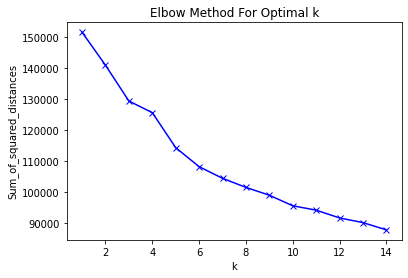

In [ ]:
# plot SSE vs K to determine the optimal k value 
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [ ]:
k = 5
# fit the k-means model 
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(cardata_final)

In [ ]:
# make predictions
y_pred

array([0, 0, 0, ..., 2, 2, 2], dtype=int32)

In [ ]:
# centroids
kmeans.cluster_centers_

array([[-3.81274133e+00, -1.95007474e-01,  3.40437405e-01, ...,
        -9.97465999e-18, -5.42101086e-18,  1.08420217e-19],
       [ 1.05010396e-01, -1.28736519e-01,  1.62984760e-01, ...,
         8.89045781e-17, -7.58941521e-18, -8.51098705e-18],
       [ 2.60088556e-01,  3.51560667e-03,  1.85864653e-01, ...,
         3.38430684e-03,  2.25620456e-03,  6.26723490e-04],
       [ 9.19424177e-01,  1.13539875e+02, -3.40288521e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 2.55178180e-02,  3.78875920e-01, -1.89636018e+00, ...,
         7.80625564e-18, -6.72205347e-18,  2.92734587e-18]])

**Main Function**

In [ ]:
@anvil.server.callable
def calculate(Price, Year, Seat, Size):
  # values need for later calculations
  target = [[None,None,Year, Size,Price, None, None, None, 1, Seat,None, None,None]]
  target= pd.DataFrame(target, columns=['Make','Model','Year','Vehicle.Size','MSRP','generation','series','trim','whether_recommended','number_of_seats','range_km','range_low','range_high'])

  # put the data through the pipeline
  target_transformed = full_pipeline.transform(target)

  # make predictions
  y_pred = kmeans.predict(target_transformed)
  car_label = y_pred[0]

  # get the cars in the second cluster (unscaled data)
  cluster_unscaled = cardata.iloc[np.where(kmeans.labels_==car_label)]
  cluster_unscaled

  # get the car that's hybrid or electric in the cluster
  EV_cluster = cluster_unscaled[cluster_unscaled['whether_recommended'] == 1]
  EV_cluster_index = EV_cluster.index
  EV_cluster_index

  # find EV the most similar to the car the user input 
  # need to find the lowest value in the similarity index BUT need to make sure the car is electric or hybrid 
  min = float('inf')
  min_index = 0
  for index in EV_cluster_index:
    car_index_data = cardata_final[index]
    distance = np.linalg.norm(target_transformed-car_index_data)
    if distance < min:
      min = distance
      min_index = index
  if min_index == 0:
    min_index = 5360
  car_recommended = pd.DataFrame(cardata.iloc[[min_index]])

  # extract features from the recommended car
  make=list(car_recommended['Make'])[0]
  model=list(car_recommended['Model'])[0]
  year=list(car_recommended['Year'])[0]
  size=list(car_recommended['Vehicle.Size'])[0]
  price=list(car_recommended['MSRP'])[0]
  number_of_seats=list(car_recommended['number_of_seats'])[0]
  tax_credit=list(car_recommended['tax_credit'])[0]
  fuel=list(car_recommended['mixed_fuel_consumption_per_100_km_l'])[0]
  rec=list(car_recommended['whether_recommended'])[0]
  co2=list(car_recommended['CO2_per_100km_kg'])[0]

  # calculate cost and emissions savings
  if str(tax_credit)=='nan':
    tax_credit=0
  if str(fuel)=='nan':
    fuel=0
  fuel=round((9.28-fuel)/3.78,2)
  co2=round(31.81-co2,2)
  l=0.866
  money = round(11824/60*fuel*3.262,2)
  # columns=['Make','Model','Year','Vehicle.Size','MSRP','generation','series','trim','whether_recommended','number_of_seats','range_km''range_low','range_high']
  s1="Make: "+ make+"; Model: "+model+ "; Year: "+str(year)+"; Size: "+size+"; Price: "+str(price)+"; Number of Seats: "+str(number_of_seats)
  s2="You earn the tax credit of $" +str(tax_credit)
  #s3= "On average, you will be able to save "+str(fuel)+" gallons of fuel per 60 miles."
  s4= "On average, you will save "+str(co2)+"kgs of CO2 per 60 miles compared to a similar gasoline-powered car."
  s5= "On average, you will be able to save $"+str(money)+" per year in fuel costs!" 
  return s1,s2,s4,s5


In [ ]:
# test the model with sample user input
calculate(40000,2020,7,'Large')

('Make: Infiniti; Model: QX60; Year: 2016; Size: Large; Price: 42600; Number of Seats: 7',
 'You earn the tax credit of $0.0',
 'On average, you will save 5.11kgs of CO2 per 60 miles compared to a similar gasoline-powered car.',
 'On average, you will be able to save $134.99 per year in fuel costs!')

# BIRCH

In [ ]:
from sklearn.cluster import Birch
brc = Birch(n_clusters=5)
brc.fit(cardata_final) 

# same function as above, but with BIRCH as the clustering algorithm instead of K Means
def calculate_brc(Price, Year, Seat, Size):
  target = [[None,None,Year, Size,Price, None, None, None, 1, Seat,None, None,None]]
  target= pd.DataFrame(target, columns=['Make','Model','Year','Vehicle.Size','MSRP','generation','series','trim','whether_recommended','number_of_seats','range_km','range_low','range_high'])

  # put the data through the pipeline
  target_transformed = full_pipeline.transform(target)

  # make predictions
  y_pred = brc.predict(target_transformed)
  car_label = y_pred[0]

  # get the cars in the second cluster (unscaled data)
  cluster_unscaled = cardata.iloc[np.where(kmeans.labels_==car_label)]
  cluster_unscaled

  # get the car that's hybrid or electric in the cluster
  EV_cluster = cluster_unscaled[cluster_unscaled['whether_recommended'] == 1]
  EV_cluster_index = EV_cluster.index
  EV_cluster_index

  # find EV the most similar to the car the user input 
  # need to find the lowest value in the similarity index BUT need to make sure the car is electric or hybrid 
  min = float('inf')
  min_index = 0
  for index in EV_cluster_index:
    car_index_data = cardata_final[index]
    distance = np.linalg.norm(target_transformed-car_index_data)
    if distance < min:
      min = distance
      min_index = index
  if min_index == 0:
    min_index = 5360
  car_recommended = pd.DataFrame(cardata.iloc[[min_index]])

  # extract features from the recommended car
  make=list(car_recommended['Make'])[0]
  model=list(car_recommended['Model'])[0]
  year=list(car_recommended['Year'])[0]
  size=list(car_recommended['Vehicle.Size'])[0]
  price=list(car_recommended['MSRP'])[0]
  number_of_seats=list(car_recommended['number_of_seats'])[0]
  tax_credit=list(car_recommended['tax_credit'])[0]
  fuel=list(car_recommended['mixed_fuel_consumption_per_100_km_l'])[0]
  rec=list(car_recommended['whether_recommended'])[0]
  co2=list(car_recommended['CO2_per_100km_kg'])[0]

  # calculate cost and emissions savings
  if str(tax_credit)=='nan':
    tax_credit=0
  if str(fuel)=='nan':
    fuel=0
  fuel=round((9.28-fuel)/3.78,2)
  co2=round(31.81-co2,2)
  l=0.866
  money = round(11824/60*fuel*3.262,2)
  # columns=['Make','Model','Year','Vehicle.Size','MSRP','generation','series','trim','whether_recommended','number_of_seats','range_km''range_low','range_high']
  s1="Make: "+ make+"; Model: "+model+ "; Year: "+str(year)+"; Size: "+size+"; Price: "+str(price)+"; Number of Seats: "+str(number_of_seats)
  s2="You earn the tax credit of $" +str(tax_credit)
  #s3= "On average, you will be able to save "+str(fuel)+" gallons of fuel per 60 miles."
  s4= "On average, you will save "+str(co2)+"kgs of CO2 per 60 miles compared to a similar gasoline-powered car."
  s5= "On average, you will be able to save $"+str(money)+" per year in fuel costs!" 
  return s1,s2,s4,s5


In [ ]:
# test the model with sample user input
calculate_brc(40000,2020,7,'Large')

('Make: Nissan; Model: Leaf; Year: 2017; Size: Compact; Price: 27400; Number of Seats: 5',
 'You earn the tax credit of $7500.0',
 'On average, you will save 31.81kgs of CO2 per 60 miles compared to a similar gasoline-powered car.',
 'On average, you will be able to save $1581.37 per year in fuel costs!')

# Mean Shift

In [ ]:
from sklearn.cluster import MeanShift
mea = MeanShift(bandwidth=2).fit(cardata_final)

# same function as above, but with mean shift as the clustering algorithm instead of K Means
def calculate_mea(Price, Year, Seat, Size):
  target = [[None,None,Year, Size,Price, None, None, None, 1, Seat,None, None,None]]
  target= pd.DataFrame(target, columns=['Make','Model','Year','Vehicle.Size','MSRP','generation','series','trim','whether_recommended','number_of_seats','range_km','range_low','range_high'])

  # put the data through the pipeline
  target_transformed = full_pipeline.transform(target)

  # make predictions
  y_pred = mea.predict(target_transformed)
  car_label = y_pred[0]

  # get the cars in the second cluster (unscaled data)
  cluster_unscaled = cardata.iloc[np.where(kmeans.labels_==car_label)]
  cluster_unscaled

  # get the car that's hybrid or electric in the cluster
  EV_cluster = cluster_unscaled[cluster_unscaled['whether_recommended'] == 1]
  EV_cluster_index = EV_cluster.index
  EV_cluster_index

  # find EV the most similar to the car the user input 
  # need to find the lowest value in the similarity index BUT need to make sure the car is electric or hybrid 
  min = float('inf')
  min_index = 0
  for index in EV_cluster_index:
    car_index_data = cardata_final[index]
    distance = np.linalg.norm(target_transformed-car_index_data)
    if distance < min:
      min = distance
      min_index = index
  if min_index == 0:
    min_index = 5360
  car_recommended = pd.DataFrame(cardata.iloc[[min_index]])

  # extract features from the recommended car 
  make=list(car_recommended['Make'])[0]
  model=list(car_recommended['Model'])[0]
  year=list(car_recommended['Year'])[0]
  size=list(car_recommended['Vehicle.Size'])[0]
  price=list(car_recommended['MSRP'])[0]
  number_of_seats=list(car_recommended['number_of_seats'])[0]
  tax_credit=list(car_recommended['tax_credit'])[0]
  fuel=list(car_recommended['mixed_fuel_consumption_per_100_km_l'])[0]
  rec=list(car_recommended['whether_recommended'])[0]
  co2=list(car_recommended['CO2_per_100km_kg'])[0]
 
  # calculate cost and emissions savings
  if str(tax_credit)=='nan':
    tax_credit=0
  if str(fuel)=='nan':
    fuel=0
  fuel=round((9.28-fuel)/3.78,2)
  co2=round(31.81-co2,2)
  l=0.866
  money = round(11824/60*fuel*3.262,2)
  # columns=['Make','Model','Year','Vehicle.Size','MSRP','generation','series','trim','whether_recommended','number_of_seats','range_km''range_low','range_high']
  s1="Make: "+ make+"; Model: "+model+ "; Year: "+str(year)+"; Size: "+size+"; Price: "+str(price)+"; Number of Seats: "+str(number_of_seats)
  s2="You earn the tax credit of $" +str(tax_credit)
  #s3= "On average, you will be able to save "+str(fuel)+" gallons of fuel per 60 miles."
  s4= "On average, you will save "+str(co2)+"kgs of CO2 per 60 miles compared to a similar gasoline-powered car."
  s5= "On average, you will be able to save $"+str(money)+" per year in fuel costs!" 
  return s1,s2,s4,s5

In [ ]:
calculate_mea(40000,2020,7,'Large')

('Make: Smart; Model: Fortwo; Year: 2014; Size: Compact; Price: 28750; Number of Seats: 2',
 'You earn the tax credit of $7500.0',
 'On average, you will save 31.81kgs of CO2 per 60 miles compared to a similar gasoline-powered car.',
 'On average, you will be able to save $1581.37 per year in fuel costs!')

# User Interface

In [ ]:
# keep the server running
anvil.server.wait_forever()